In [ ]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
col_names = ['Slope','DEM','DBU','DR', 'DW','Zones']

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/testupdated.csv', header=None, names=col_names)

In [ ]:
dataset.head()

,Slope,DEM,DBU,DR,DW,Zones
0,0.0,0,276.585999,0.020934,0.000000,Extreme Vulnerable Zone
1,0.0,0,152.970993,0.002982,30.000000,Extreme Vulnerable Zone
2,0.0,0,381.838013,0.003378,0.000000,Extreme Vulnerable Zone
3,0.0,0,161.554993,0.002805,42.426399,Extreme Vulnerable Zone
4,0.0,0,0.000000,0.007063,42.426399,Extreme Vulnerable Zone


In [ ]:
feature_cols = ['Slope', 'DEM', 'DBU', 'DR', 'DW']
X = dataset[feature_cols] # Features
y = dataset.Zones # Target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print(y)

[1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0]


In [ ]:
print(y_test)

[4 4 2 4 0 2 2 4 4 3 0 2 3 3 3 2 2 2 4 5 1 4 0 3 2 2 0 2 2 2]


In [ ]:
print(y_pred)

[4 4 3 4 4 2 2 3 3 3 4 3 2 3 2 2 2 2 4 2 1 4 4 1 2 1 4 3 2 2]


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5333333333333333


In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
pip install six

In [ ]:
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 5.4 MB 4.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


In [ ]:
from six import StringIO

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

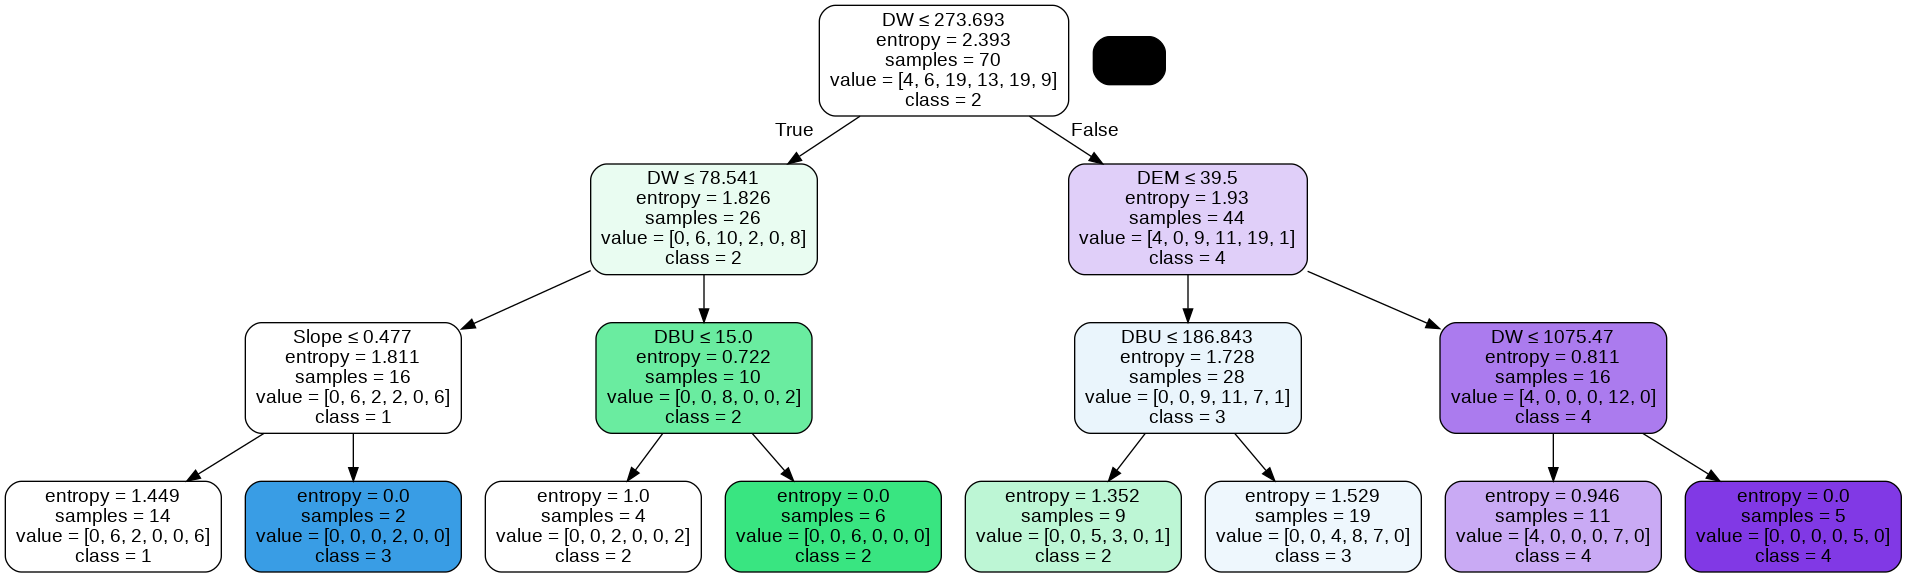

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())